In [7]:
%run utils.ipynb

In [2]:
%matplotlib inline
#%matplotlib notebook

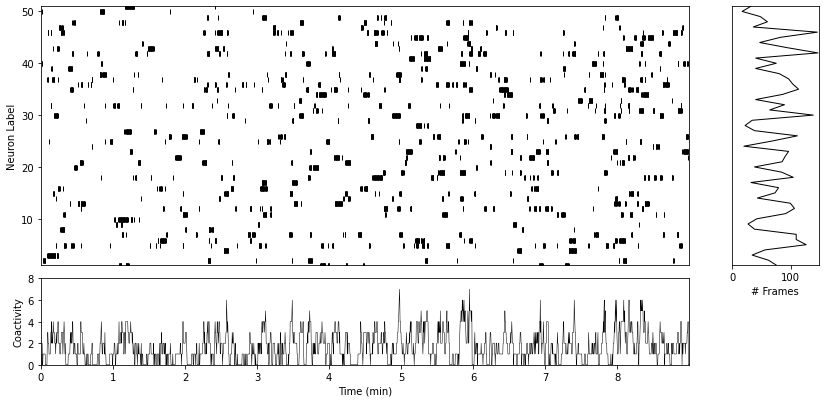

In [3]:
fps=4
raster = np.load("../data/f5_1_raster.npy").T
raster=np.delete(raster, np.where(np.sum(raster,axis=1)==0)[0],axis=0).copy()
plot_raster(raster,fps)
#plt.savefig('../figures/raster.svg', format='svg', dpi=300, transparent=True)

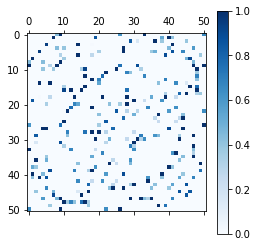

In [4]:
mapper = umap.UMAP(n_neighbors=5,min_dist=0.1,n_components=3,random_state=42,metric='correlation',).fit(raster)
ma=get_adj_matrix(mapper)
plt.matshow(ma,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/adj_matrix.svg', format='svg', dpi=300, transparent=True)
plt.show()

In [5]:
cluster_index,mat_mismo_grupo=get_clusters_modularidad(ma,n_iter=1000)
cluster_index=nuevo_cluster_index(cluster_index,[4,2,3,5,1,6,0])

Number of Ensembles:  7


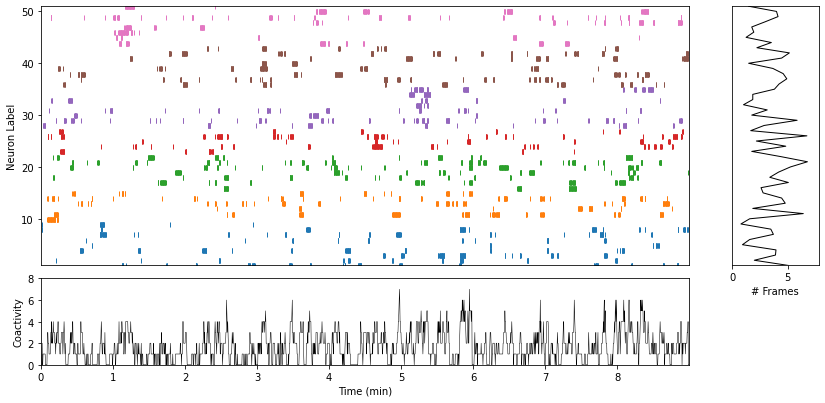

In [8]:
ord_plot_ch=plot_cluster_raster(raster,fps,cluster_index,name_colormap='tab10')
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

In [9]:
test_coactivity_is_random(raster,cluster_index,1000)

Cluster 0
rt = -36.85174131576576
p = 2.742649417806076e-297
alphahat 0.0
betahat 0.0

Cluster 1
rt = -37.142149267665204
p = 5.86970646394639e-302
alphahat 0.0
betahat 0.0

Cluster 2
rt = -37.86516226048722
p = 0.0
alphahat 0.0
betahat 0.0

Cluster 3
rt = -35.814452228642324
p = 6.57974471410616e-281
alphahat 0.0
betahat 0.0

Cluster 4
rt = -37.047064470829234
p = 2.0023614171204733e-300
alphahat 0.0
betahat 0.0

Cluster 5
rt = -37.1444626319284
p = 5.386072406039049e-302
alphahat 0.0
betahat 0.0

Cluster 6
rt = -37.533094584877354
p = 2.6588429913952594e-308
alphahat 0.0
betahat 0.0



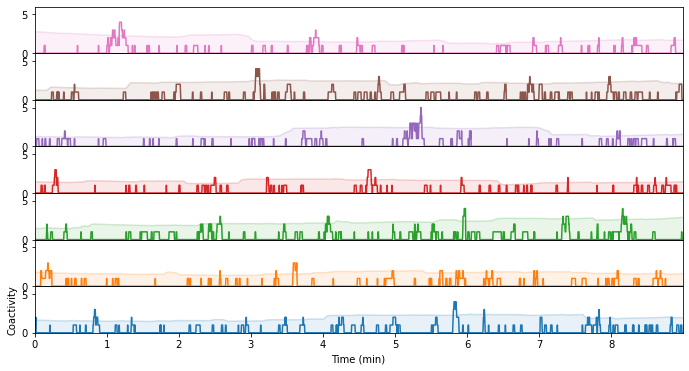

In [10]:
plot_coactivity_ensambles(raster,cluster_index,1000,'tab10',fps,20,3)
#plt.savefig('../figures/coactivity_ensamble_rasters.svg', format='svg', dpi=300,transparent=True)

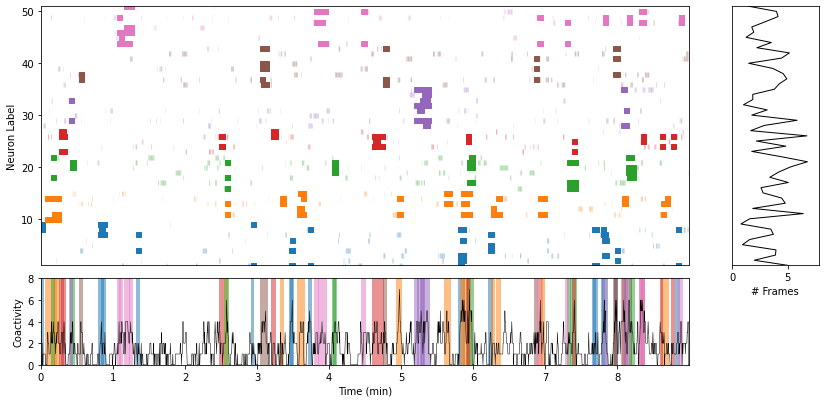

In [11]:
ord_plot_ch,ensembles_in_time=plot_ensamble_raster(raster,fps,cluster_index,'tab10',3,20,5)
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

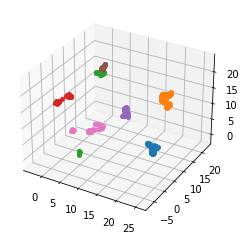

In [12]:
mapper_cols,color_to_plot,colores=get_3D_projection_vectors(raster,cluster_index,'tab10',20,3,0.5,42,'euclidean')
#plt.savefig('../figures/proj_cols.svg', format='svg', dpi=300,transparent=True)

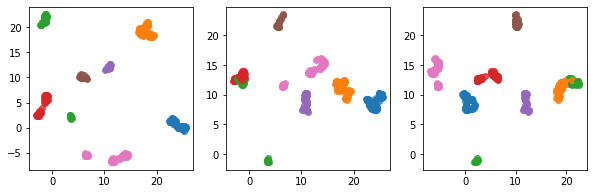

In [13]:
cmap = matplotlib.cm.get_cmap('tab10')
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(131)
for i in range(mapper_cols.embedding_.shape[0]):
    ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 1],color=cmap(color_to_plot[i]),alpha=0.8)
    
ax = fig.add_subplot(132)
for i in range(mapper_cols.embedding_.shape[0]):
    ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]),alpha=0.8)
    
ax = fig.add_subplot(133)
for i in range(mapper_cols.embedding_.shape[0]):
    ax.scatter(mapper_cols.embedding_[i, 1], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]),alpha=0.8)

#plt.savefig('../figures/planes_proj_columns.svg', format='svg', dpi=300,transparent=True)

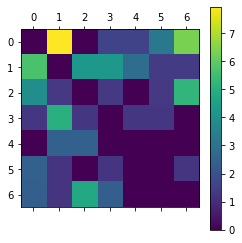

In [14]:
transition_matrix=get_transition_matrix(colores,cluster_index)
plt.matshow(transition_matrix)
plt.colorbar()

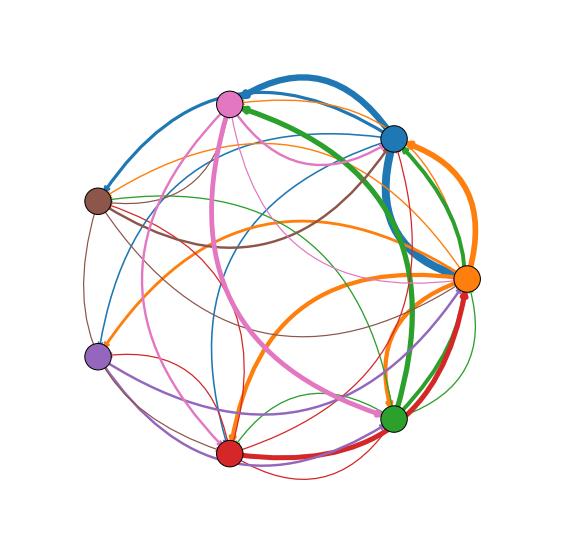

In [15]:
G,color_map=get_transition_graph(transition_matrix,cmap)
default_pos = nx.circular_layout(G)

new_pos={}
new_pos[0]=default_pos[1]
new_pos[1]=default_pos[0]
new_pos[2]=default_pos[6]
new_pos[3]=default_pos[5]
new_pos[4]=default_pos[4]
new_pos[5]=default_pos[3]
new_pos[6]=default_pos[2]

edge_weight = [G[edge[0]][edge[1]]["weight"] for edge in G.edges()]
edge_colors = [G[edge[0]][edge[1]]["color"] for edge in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos=new_pos,node_color=color_map,node_size=700,edgecolors='black')
nx.draw_networkx_edges(G, pos=new_pos, width=edge_weight,edge_color=edge_colors,connectionstyle="arc3,rad=0.5",
                      arrowstyle='->')
plt.box(False)
#plt.savefig('../figures/graph_sequences_ensembles.svg', format='svg', dpi=300,transparent=True)
plt.show()